# H8

## Basic geometric objects

In [1]:
#import packages
import shapely
import geopandas as gpd
from shapely.geometry import Point, Polygon, LineString
import pandas as pd
from matplotlib import pyplot as plt
import random
import pylab as pl
%matplotlib inline


**Basic functions:**

In [2]:
#grab a random color for coloring a figure
def get_random_color():
    r = lambda: random.randint(0,255)
    return('#%02X%02X%02X' % (r(),r(),r()))

#initialize the figure and draw the shape
def plot(shapelyGeometries, color_dict={"fill":"#AADDCC", "line":"#666666","hole_fill":"#ffffff", "hole_line":"#999999" }):
    'Plot shapelyGeometries'
    figure = pl.figure(num=None, figsize=(3, 3), dpi=100)
    axes = pl.axes()
    axes.set_aspect('equal', 'datalim')
    axes.xaxis.set_visible(False)
    axes.yaxis.set_visible(False)
    
    draw(shapelyGeometries, color_dict)
            
#Check the type and break up multipolygons        
def draw(gs, color_dict):
    'Draw shapelyGeometries'
    # Handle single and lists of geometries
    try:
        gs = iter(gs)
    except TypeError:
        gs = [gs]
    #Route polygons and multipolygons to the right place
    for g in gs:
        gType = g.geom_type
        if gType.startswith('Multi') or gType == 'GeometryCollection':
            draw(g.geoms, color_dict)
        else:
            draw_(g, color_dict)

#Break the shape into its interior and exterior rings            
def draw_(g, color_dict):

    'Draw a shapelyGeometry; thanks to Sean Gilles'
    gType = g.geom_type
    if gType == 'Point':
        pl.plot(g.x, g.y, 'k,')
    elif gType == 'LineString':
        x, y = g.xy
        pl.plot(x, y, 'b-', color=color_dict["line"])
    elif gType == 'Polygon':
        #can draw parts as multiple colors
        if not color_dict:
            color_dict={"fill":get_random_color(), 
                        "line":"#666666",
                        "hole_fill":"#FFFFFF", 
                        "hole_line":"#999999" }
    
    
        x, y = g.exterior.xy
        pl.fill(x, y, color=color_dict["fill"], aa=True) 
        pl.plot(x, y, color=color_dict["line"], aa=True, lw=1.0)
        for hole in g.interiors:
            x, y = hole.xy
            pl.fill(x, y, color=color_dict["hole_fill"], aa=True) 
            pl.plot(x, y, color=color_dict["hole_line"], aa=True, lw=1.0)
            

### 1.

In [3]:
#in this function you input a number of object you want to paint and you get the plot,
#a list of the areas of the objects and the list of the object
def RandomPlot(n):
    if n >=4:
        areas = []
        kinds = [Point,Polygon,LineString] #list of kinds
        plots = []
        for i in range(n):
            kind = random.choice(kinds)
            if kind == LineString:
                ls = (kind(((random.randint(-5,5),random.randint(-5,5)),(random.randint(-5,5),random.randint(-5,5)))))
                plots.append(ls)
                areas.append(ls.length)
            if kind == Polygon:
                pol = (kind([(random.randint(-5,5),random.randint
                                                 (-5,5)),(random.randint(-5,5),random.randint(-5,5))
                                                ,(random.randint(-5,5),random.randint(-5,5))]))
                plots.append(pol)
                areas.append(pol.area)
            if kind == Point:
                pt = kind(random.randint(-5,5),random.randint(-5,5))
                circle = pt.buffer(random.randint(1,3))
                plots.append(circle)
                areas.append(circle.area)

            
        return plot(plots),areas,plots
    else:
        return 'WRONG INPUT!! MINIMUM NUMBER IS 4'
                             


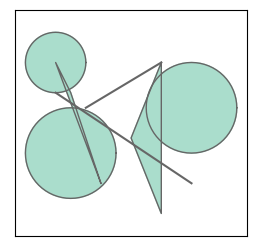

In [4]:
l = RandomPlot(7) #test the function

### 2

In [5]:
#print the areas
print(l[1]) 

[5.830951894845301, 28.228936414913456, 28.228936414913452, 10.816653826391969, 1.0, 12.546193962183757, 10.0]


In [6]:
#print the distances between th the objects only if the not touching each other
l[1]
for obj in l[2]:
    for j in l[2]:
        if obj.distance(j) !=0:   
            print('the',str(type(obj))[33:-2],'is far',obj.distance(j),'from',str(type(j))[33:-2])

the ng.LineString is far 0.1651356803257655 from Polygon
the ng.LineString is far 0.605561047557518 from Polygon
the ng.LineString is far 0.2773500981126146 from ng.LineString
the ng.LineString is far 0.632455532033676 from Polygon
the ng.LineString is far 1.6055537325834472 from Polygon
the Polygon is far 0.1651356803257655 from ng.LineString
the Polygon is far 2.5502493444097922 from Polygon
the Polygon is far 1.0878122532181858 from Polygon
the Polygon is far 1.1267188240659227 from Polygon
the Polygon is far 0.605561047557518 from ng.LineString
the Polygon is far 2.5502493444097922 from Polygon
the Polygon is far 1.1602531129226932 from ng.LineString
the Polygon is far 4.2743504521759865 from Polygon
the Polygon is far 4.490588865797984 from Polygon
the ng.LineString is far 0.2773500981126146 from ng.LineString
the ng.LineString is far 1.1602531129226932 from Polygon
the ng.LineString is far 1.743233977699361e-16 from Polygon
the Polygon is far 0.632455532033676 from ng.LineString


### 3

In [7]:
#read the files
UE = gpd.read_file('us-energy.geojson') 
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))

In [8]:
world.head()

,pop_est,continent,name,iso_a3,gdp_md_est,geometry
0,920938,Oceania,Fiji,FJI,8374.0,"MULTIPOLYGON (((180.00000 -16.06713, 180.00000..."
1,53950935,Africa,Tanzania,TZA,150600.0,"POLYGON ((33.90371 -0.95000, 34.07262 -1.05982..."
2,603253,Africa,W. Sahara,ESH,906.5,"POLYGON ((-8.66559 27.65643, -8.66512 27.58948..."
3,35623680,North America,Canada,CAN,1674000.0,"MULTIPOLYGON (((-122.84000 49.00000, -122.9742..."
4,326625791,North America,United States of America,USA,18560000.0,"MULTIPOLYGON (((-122.84000 49.00000, -120.0000..."


In [9]:
UE.head()

,Plant Name,Fuel type,Fuel label,Capacity (MW),Capacity label,State,State label,LowCarbon,Year opened,geometry
0,Grand Coulee,Hydro,Hydro,6495.0,"6,495",WA,Washington,Yes,1941 - 1980,POINT (-118.97730 47.95751)
1,California small solar <1MW,Solar,Solar,5749.8,"5,750",CA,California,Yes,-,POINT (-119.68156 36.11620)
2,West County Energy Center,Gas,Gas combined cycle,4263.0,"4,263",FL,Florida,No,2009 - 2011,POINT (-80.37470 26.69860)
3,Palo Verde,Nuclear,Nuclear,4209.6,"4,210",AZ,Arizona,Yes,1986 - 1988,POINT (-112.86170 33.38810)
4,Scherer,Coal,Coal,3564.0,"3,564",GA,Georgia,No,1982 - 1989,POINT (-83.80750 33.06060)


### 4

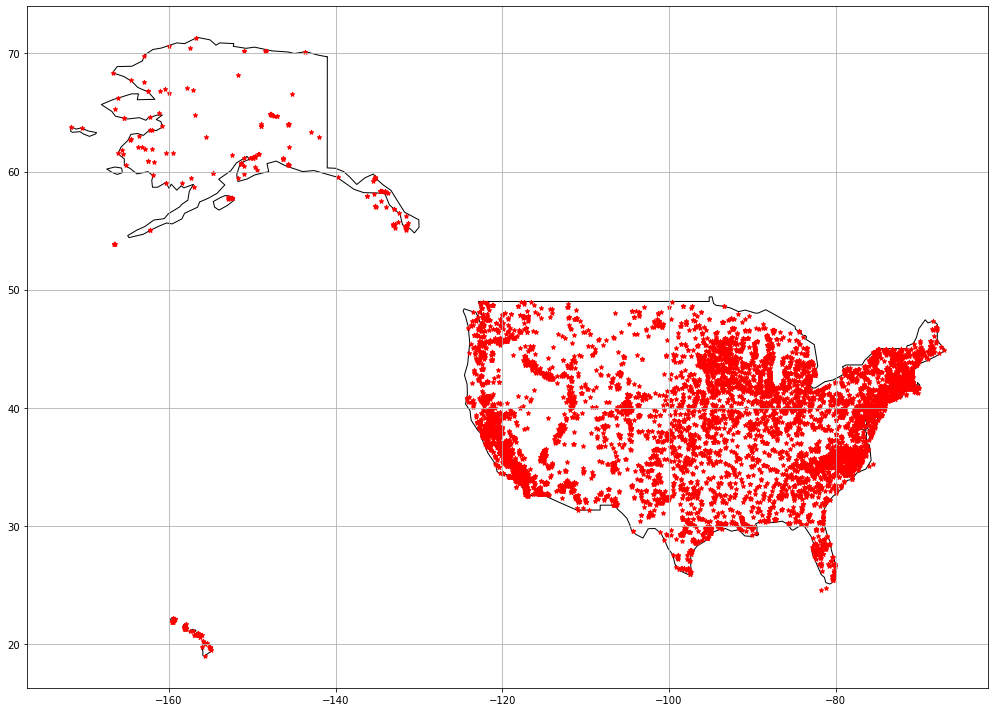

In [10]:
#a map of united states with all the plants
fig, ax = plt.subplots(figsize = (15,10))
ax.set_aspect('equal')
world.loc[(world['name'] == 'United States of America')].plot(ax = ax,
          color = 'white',
          edgecolor = 'black')

UE['geometry'].plot(ax = ax,
           color = 'red',
           marker = '*',
           markersize = 20)

plt.grid()

plt.tight_layout()

### 5

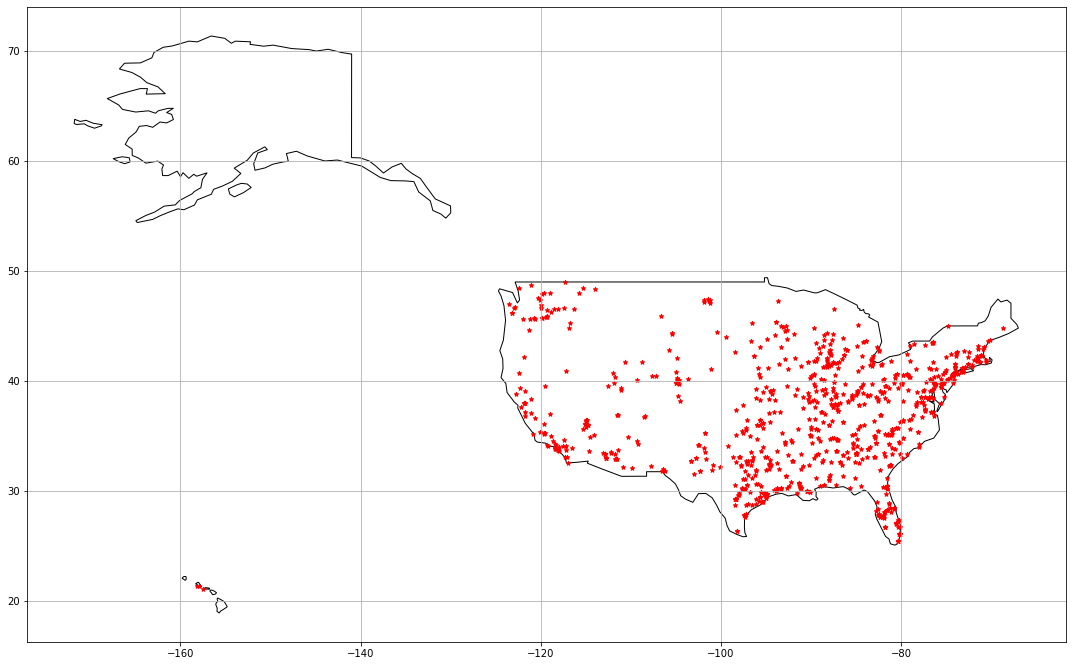

In [11]:
##a map of united states with all the plants that stand with the new condition
fig, ax = plt.subplots(figsize = (15,10))
ax.set_aspect('equal')
world.loc[(world['name'] == 'United States of America')].plot(ax = ax,
          color = 'white',
          edgecolor = 'black')

UE.loc[(UE['Capacity (MW)'] >= (UE['Capacity (MW)'].median()+UE['Capacity (MW)'].std()))].plot(ax = ax,
           color = 'red',
           marker = '*',
           markersize = 20)

plt.grid()

plt.tight_layout()

### 6

In [12]:
#sum of each solar capacity by each state 
UE.loc[(UE['Fuel type'] == 'Solar')].groupby('State')['Capacity (MW)'].sum()

State
AK        1.7
AL       85.6
AR       18.6
AZ     2877.4
CA    15867.2
CO      728.0
CT      310.2
DC       46.0
DE      121.7
FL      511.2
GA      978.1
HI      646.8
IA       53.6
ID      248.6
IL       68.0
IN      199.4
KS        9.2
KY       24.7
LA      126.3
MA     1541.6
MD      765.3
ME       27.0
MI       60.5
MN      384.6
MO      151.8
MS       36.4
MT        9.1
NC     2906.8
ND        0.2
NE        9.2
NH       62.4
NJ     1918.1
NM      570.5
NV     1881.6
NY      964.4
OH      156.9
OK       16.2
OR      226.0
PA      348.1
RI       43.7
SC      108.4
SD        1.7
TN      124.7
TX     1356.9
UT     1010.8
VA      186.0
VT      144.4
WA       83.9
WI       46.3
WV        5.1
WY        2.7
Name: Capacity (MW), dtype: float64

### 7

In [13]:
print('total capacity',UE['Capacity (MW)'].sum()) #total us
UE.groupby('State')['Capacity (MW)'].sum() #total each state
print('the precent of each state',UE.groupby('State')['Capacity (MW)'].sum()/UE['Capacity (MW)'].sum()) #the precent of each state

total capacity 1197747.2999999998
the precent of each state State
AK    0.002515
AL    0.026353
AR    0.013642
AZ    0.027535
CA    0.072271
CO    0.015131
CT    0.008297
DC    0.000059
DE    0.003074
FL    0.058342
GA    0.032989
HI    0.002922
IA    0.015937
ID    0.004367
IL    0.042424
IN    0.023965
KS    0.014257
KY    0.019893
LA    0.023893
MA    0.013235
MD    0.012589
ME    0.004375
MI    0.026863
MN    0.015082
MO    0.019941
MS    0.015118
MT    0.005359
NC    0.029663
ND    0.007201
NE    0.007710
NH    0.003903
NJ    0.018399
NM    0.008078
NV    0.011055
NY    0.036834
OH    0.026479
OK    0.023633
OR    0.014407
PA    0.040401
RI    0.001779
SC    0.020654
SD    0.003671
TN    0.020183
TX    0.108357
UT    0.008309
VA    0.024377
VT    0.000679
WA    0.026571
WI    0.015956
WV    0.013355
WY    0.007917
Name: Capacity (MW), dtype: float64


### 8

In [14]:
#read file
US = gpd.read_file('us-states.json')
US.head()

,id,name,density,geometry
0,01,Alabama,94.650,"POLYGON ((-87.359 35.001, -85.607 34.985, -85...."
1,02,Alaska,1.264,"MULTIPOLYGON (((-131.602 55.118, -131.569 55.2..."
2,04,Arizona,57.050,"POLYGON ((-109.043 37.000, -109.048 31.332, -1..."
3,05,Arkansas,56.430,"POLYGON ((-94.474 36.502, -90.153 36.496, -90...."
4,06,California,241.700,"POLYGON ((-123.233 42.006, -122.379 42.012, -1..."


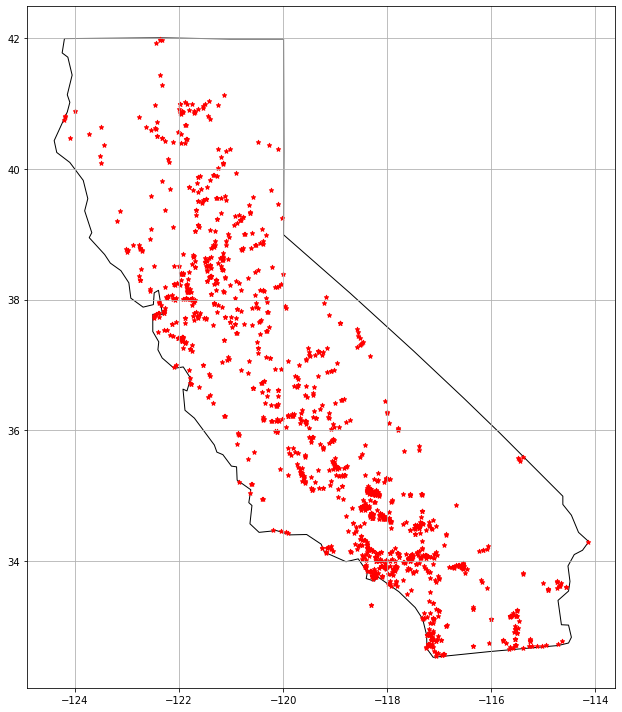

In [15]:
#map of california with all the plants
fig, ax = plt.subplots(figsize = (15,10))
ax.set_aspect('equal')
US.loc[(US['name'] == 'California')]['geometry'].plot(ax = ax,
          color = 'white',
          edgecolor = 'black')

UE.loc[(UE['State'] == 'CA')]['geometry'].plot(ax = ax,
           color = 'red',
           marker = '*',
           markersize = 20)

plt.grid()

plt.tight_layout()

### 9

In [16]:
#new df of the sum capacity by each state
df = pd.DataFrame(UE.groupby('State label')['Capacity (MW)'].sum())


In [17]:
#join the new df to US df and call it USnew
USnew = US.join(df,on = 'name')
print(len(USnew))

52


<AxesSubplot:>

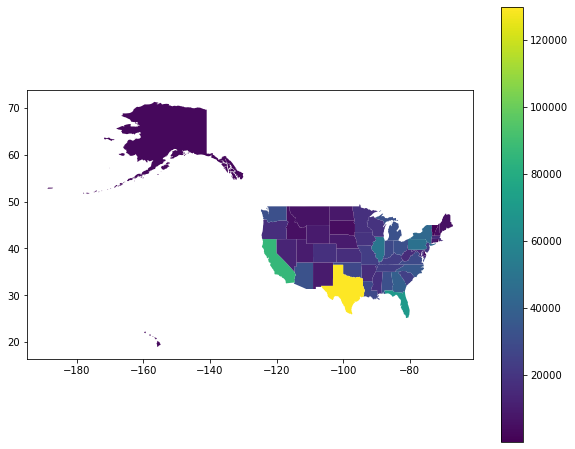

In [18]:
#map that divides the capacity of each state
USnew.plot(figsize = (10,8),
          column = 'Capacity (MW)',k = 52,legend = True)